In [1]:
import zipfile
path = '/content/drive/MyDrive/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

In [8]:
from PIL import Image
import cv2
import numpy as np

In [2]:
 import os
print(os.listdir('/content/yalefaces/train'))

['subject15.wink.gif', 'subject04.noglasses.gif', 'subject02.sleepy.gif', 'subject09.happy.gif', 'subject11.centerlight.gif', 'subject15.surprised.gif', 'subject05.normal.gif', 'subject05.wink.gif', 'subject08.surprised.gif', 'subject11.rightlight.gif', 'subject15.leftlight.gif', 'subject07.centerlight.gif', 'subject10.surprised.gif', 'subject03.rightlight.gif', 'subject06.noglasses.gif', 'subject13.happy.gif', 'subject08.noglasses.gif', 'subject12.sad.gif', 'subject06.sleepy.gif', 'subject10.sleepy.gif', 'subject03.happy.gif', 'subject04.normal.gif', 'subject14.glasses.gif', 'subject07.sad.gif', 'subject08.sad.gif', 'subject03.surprised.gif', 'subject03.centerlight.gif', 'subject12.noglasses.gif', 'subject07.glasses.gif', 'subject11.surprised.gif', 'subject10.wink.gif', 'subject08.wink.gif', 'subject07.surprised.gif', 'subject01.glasses.gif', 'subject01.surprised.gif', 'subject09.centerlight.gif', 'subject10.glasses.gif', 'subject10.noglasses.gif', 'subject09.leftlight.gif', 'subject0

In [21]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    # print(path)
    image = Image.open(path).convert('L')
    # print(type(image))
    image_np = np.array(image,'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    ids.append(id)
    faces.append(image_np)
    # print(id)
  return np.array(ids), faces  

In [23]:
ids, faces = get_image_data()

In [24]:
ids  

array([15,  4,  2,  9, 11, 15,  5,  5,  8, 11, 15,  7, 10,  3,  6, 13,  8,
       12,  6, 10,  3,  4, 14,  7,  8,  3,  3, 12,  7, 11, 10,  8,  7,  1,
        1,  9, 10, 10,  9,  4,  5,  8,  5,  3, 14, 10,  8, 14,  1, 13,  3,
       13,  9, 14,  4, 12,  7,  2,  2,  1,  4, 11,  3, 14,  4, 15,  5,  5,
        4, 12, 12,  8,  4,  8,  9, 12, 12,  2,  2,  7, 13, 13,  2,  7,  8,
        5, 11, 13,  1,  9, 14,  6, 14, 13,  5, 11, 12, 11, 12, 15,  1, 11,
        4, 10,  2, 13, 15,  7,  5, 15,  3,  9,  2,  2,  6,  9,  6,  1,  3,
        6,  6, 13,  1,  6, 15,  9,  7, 10,  6, 14, 14, 10, 15, 11,  1])

In [25]:
len(ids) , len(faces)

(135, 135)

In [27]:
faces[0] , faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

In [28]:
243*320

77760

In [29]:
# Training the LBPH classifier

In [63]:
# 8 X 8 = 64

# Without parameters -:
# lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
# lbph_classifier.train(faces,ids)
# lbph_classifier.write('lbph_classifier.yml')

# With parameters -:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4,neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [32]:
# Recognizing Faces

In [64]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [65]:
test_image = '/content/yalefaces/test/subject09.sad.gif'

In [66]:
image = Image.open(test_image).convert('L')
image_np = np.array(image,'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 238, 237],
       [255, 255, 255, ..., 255, 235, 237],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [36]:
image_np.shape

(243, 320)

In [37]:
predictions = lbph_face_classifier.predict(image_np)
predictions

(9, 10.500599116253822)

In [38]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))

In [39]:
expected_output

9

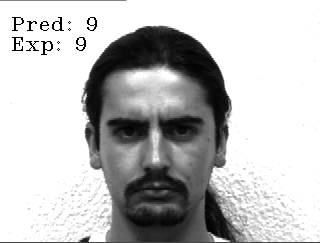

In [47]:
from google.colab.patches import cv2_imshow
cv2.putText(image_np,'Pred: '+ str(predictions[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(image_np,'Exp: '+ str(expected_output),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))

cv2_imshow(image_np)

In [48]:
#EVALUATING THE FACE CLASSIFIER

In [67]:
paths = [os.path.join('/content/yalefaces/test',f)for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  # print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image,'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [68]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [55]:
predictions

array([ 7,  4, 14,  4,  9,  9,  4,  7,  4,  5,  8, 11,  9, 10,  7,  1,  3,
       12,  5, 14,  5,  9,  1, 13, 13, 11,  6, 12, 15, 14])

In [56]:
expected_outputs

array([ 7,  2, 14, 10,  3,  7,  8,  9,  4,  5,  8, 11,  4, 10, 15,  1,  3,
       12,  2, 14,  5,  9,  1, 13, 13, 11,  6, 12, 15,  6])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.7

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions)


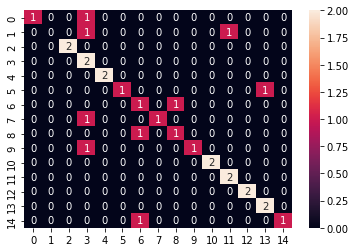

In [71]:
import seaborn
seaborn.heatmap(cm,annot=True)